In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image 

In [22]:
train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # fill_mode='nearest'
)
test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest'
    )

In [23]:
BATCH_SIZE = 3
train_dataset = train.flow_from_directory('train/', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='binary')
test_dataset = test.flow_from_directory('test/', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='binary')

Found 70 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [24]:
train_dataset.class_indices

{'matang': 0, 'mentah': 1}

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 99, 99, 16)        0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 48, 48, 32)       

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
EPOCH = 30
model_fit = model.fit(train_dataset, epochs=EPOCH, validation_data=test_dataset) 

Epoch 1/30
24/24 [==============================] - 6s 224ms/step - loss: 0.9891 - accuracy: 0.4857 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
24/24 [==============================] - 5s 210ms/step - loss: 0.6934 - accuracy: 0.4857 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
24/24 [==============================] - 5s 207ms/step - loss: 0.6927 - accuracy: 0.4571 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 4/30
24/24 [==============================] - 5s 212ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6828 - val_accuracy: 0.5000
Epoch 5/30
24/24 [==============================] - 5s 203ms/step - loss: 0.6812 - accuracy: 0.4857 - val_loss: 0.6695 - val_accuracy: 0.5000
Epoch 6/30
24/24 [==============================] - 5s 200ms/step - loss: 0.5989 - accuracy: 0.6143 - val_loss: 0.7564 - val_accuracy: 0.5000
Epoch 7/30
24/24 [==============================] - 5s 207ms/step - loss: 0.7325 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 

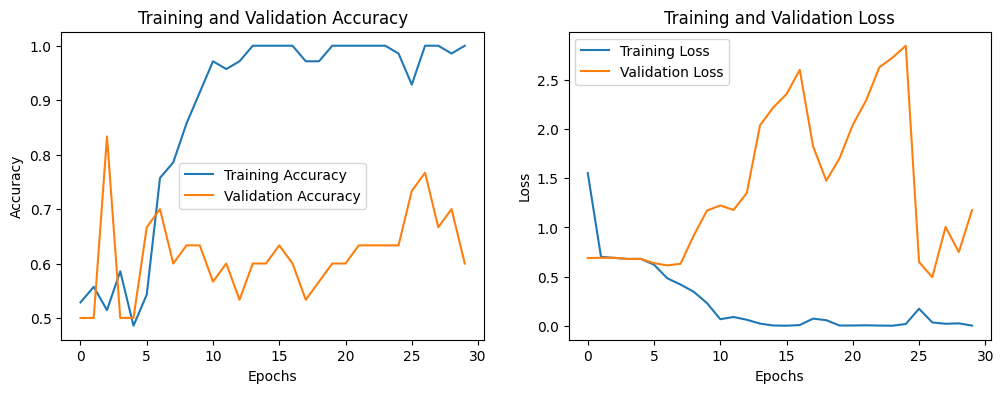

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()